<a href="https://colab.research.google.com/github/leehg9805/S-W-/blob/main/%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%8B%AC%EB%B6%80%EC%A0%84_%EC%82%AC%EB%A7%9D%EC%97%AC%EB%B6%80(1718285_%EC%9D%B4%ED%95%B4%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.캐글에서 심부전 데이터 불러오기

In [172]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [173]:
os.environ['KAGGLE_USERNAME'] = 'morbaenoma'
os.environ['KAGGLE_KEY'] = "fcf85e125cea448d18703f912fa7a8a2"

In [174]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [175]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# 2.불러온 데이터 확인


1. Age: 나이   
2. anaemia: 적혈구 또는 헤모글로빈(부울) 감소
3. creatinine_phosphokinase: 혈중 CPK 효소 수치(mcg/L)
4. diabetes: 환자에게 당뇨병이 있는 경우(부울)
5. ejection_fraction: 각 수축 시 심장에서 나가는 혈액의 백분율(백분율)
6. high_blood_pressure: 환자에게 고혈압이 있는 경우(부울)
7. platelets: 혈액 내 혈소판(킬로혈소판/mL)
8. serum_creatinine: 혈액 내 혈청 크레아티닌 수치(mg/dL)
9. serum_sodium: 혈중 나트륨 농도(mEq/L)
10. sex: 여자 또는 남자(바이너리)
11. smoking: 환자가 담배를 피우는지 여부(boolean)
12. time  :사후관리 기간(일)
13. DEATH_EVENT: 추적 기간 동안 환자가 사망한 경우(boolean)



### 불러온 데이터들을 통해 심부전 환자들 중의 증상과 성별에 대한 정보를 얻을 수 있었습니다.

In [176]:
df = pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [177]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [178]:
# info를 이용해 각 데이터의 타입을 알아 보았습니다.
# sex는 T,F로 되어 있는 것이 아니라 0,1로 되어 있기에 T,F로 바꿀 것이며
# 나머지 0,1 범주형 자료로 되어 있는 anaemia, diabetes, high_blood_pressure, smoking 를 카테고리로 바꿀 것 입니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [179]:
# isna().sum()을 이용해 NAN값의 개수를 확인 하였습니다.
# 다행이 NAN 값을 가진 컬럼은 없었습니다.
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [180]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [181]:
# 심부전증 환자의 증상을 통한 사망 여부를 예측하는 모델을 만드는 것으로 사후 시간은 필요 없기에
# 삭제를 결정 하였습니다.
df.drop(['time'],axis=1 ,inplace=True)

In [182]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

# 3.EDA

In [183]:
# 사망 여부를 좀 더 보기 편하게 하기 위해 0을 NO,1을 Yes로 표현 하였습니다.
df['DEATH_EVENT'] = df['DEATH_EVENT'].map({0:'No', 1:'Yes'})

In [184]:
# SEX를 확실히 표현 하기 위해 O(여자):F, 1(남자): M으로 표현 하였습니다.
# **** 선정한 이유는 kaggle 정보란에 여성 또는 남자로 되어있어 순서대로 설정 하였습니다.
df['sex'] = df['sex'].map({0:'F', 1:'M'})

In [185]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,Yes
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,Yes
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,Yes
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,Yes
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,M,1,No
295,55.0,0,1820,0,38,0,270000.00,1.2,139,F,0,No
296,45.0,0,2060,1,60,0,742000.00,0.8,138,F,0,No
297,45.0,0,2413,0,38,0,140000.00,1.4,140,M,1,No


## 3-1 Bar plot을 이용하여 범주형 데이터 시각화(기준 DEAT_EVENT)

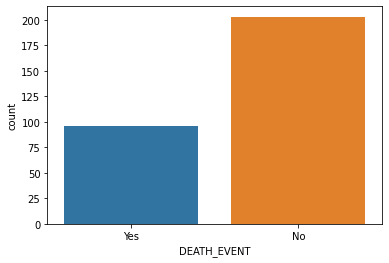

In [186]:
# 사망하는 사람 보다 사망하지 않는 사람이 많다는 것을 알 수 있습니다.
sns.countplot(x ='DEATH_EVENT', data=df)

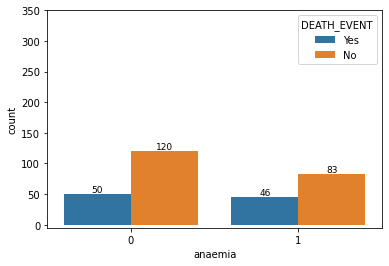

In [187]:
# anaemia가 0일 때 사망 비율 0.2941176470588235
# anaemia가 1일 때 사망 비율 0.3565891472868217
ax = sns.countplot(x = 'anaemia', data = df, hue='DEATH_EVENT',dodge = True,
                  order = df['anaemia'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 350)
plt.show()

### 적혈구 또는 헤모글로빈(부울) 감소가 이루어 질 때 좀 더 사망 가능성이 높다는 것을 알 수 있습니다.

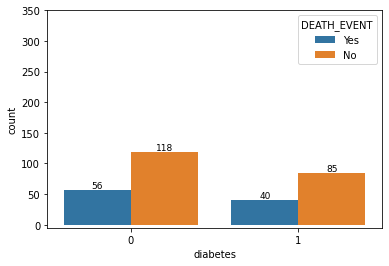

In [188]:
# diabetes가 0일 때 사망 비율 0.3218390804597701
# diabetes가 1일 때 사망 비율 0.32
ax = sns.countplot(x = 'diabetes', data = df, hue='DEATH_EVENT',dodge = True,
                  order = df['diabetes'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 350)
plt.show()

### 환자에게 당뇨병이 있는 경우던 없는 경우던 사망 비율은 비슷하다는 것을 알 수 있습니다

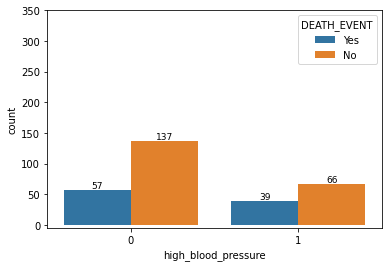

In [189]:
# high_blood_pressure가 0일 때 사망 비율 0.2938144329896907
# high_blood_pressure가 1일 때 사망 비율 0.3714285714285714
ax = sns.countplot(x = 'high_blood_pressure', data = df, hue='DEATH_EVENT',dodge = True,
                  order = df['high_blood_pressure'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 350)
plt.show()

### 환자에게 고혈압이 있는 경우(부울) 사망 비율이 높다는 것을 알 수 있습니다.

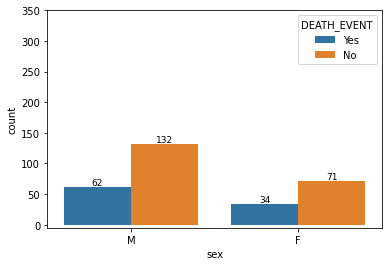

In [190]:
# sex가 M일 때 사망 비율 0.3195876288659794
# sex가 F일 때 사망 비율 0.3238095238095238
ax = sns.countplot(x = 'sex', data = df, hue='DEATH_EVENT',dodge = True,
                  order = df['sex'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 350)
plt.show()

### 여성의 사망 비율이 높다는 것을 알 수 있습니다.

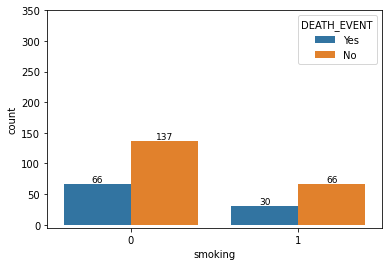

In [191]:
# smoking이 0일 때 사망 비율 0.3251231527093596
# sex가 F일 때 사망 비율 0.3125
ax = sns.countplot(x = 'smoking', data = df, hue='DEATH_EVENT',dodge = True,
                  order = df['smoking'].value_counts().index)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
ax.set_ylim(-5, 350)
plt.show()

### 흡연자라고 해서 사망 가능성이 비흡연자보다 높은 것이 아니라는 것을 알 수 있습니다.

## 3-2 histplot을 이용하여 연속형 데이터 시각화(기준 DEAT_EVENT)

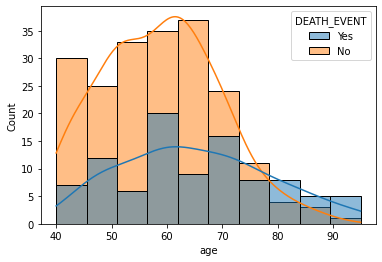

In [192]:
sns.histplot(x="age", data=df, hue='DEATH_EVENT', kde='True')

### 나이대가 있을 수록 사망 가능성이 올라갑니다.

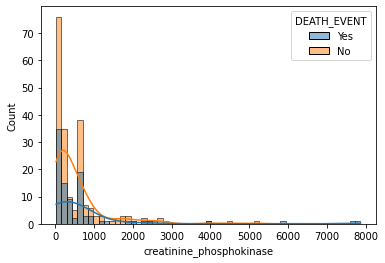

In [193]:
sns.histplot(x="creatinine_phosphokinase", data=df, hue='DEATH_EVENT', kde='True')

### 혈중 CPK 효소 수치(mcg/L) 가 낮으면 사망 가능성이 낮습니다.

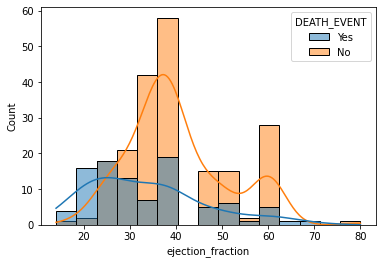

In [194]:
sns.histplot(x="ejection_fraction", data=df, hue='DEATH_EVENT', kde='True')

### 각 수축 시 심장에서 나가는 혈액의 백분율이 낮거나 높을 때 사망 가능성이 높습니다.

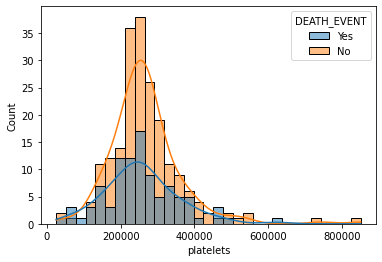

In [195]:
sns.histplot(x="platelets", data=df, hue='DEATH_EVENT', kde='True')

### 혈액 내 혈소판(킬로혈소판/mL)이 정상수치가 아니면 사망자 나온다는 것을 알 수 있습니다.

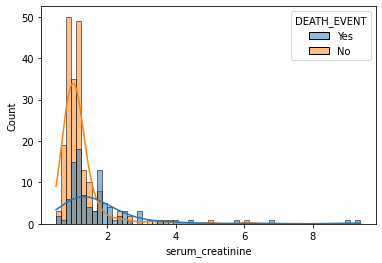

In [196]:
sns.histplot(x="serum_creatinine", data=df, hue='DEATH_EVENT', kde='True')

### 혈액 내 혈청 크레아티닌 수치(mg/dL)가 낮을 때 사망자가 덜 나옵니다. 그리고 낮은 사람들이 많다는 것을 알 수 있습니다.

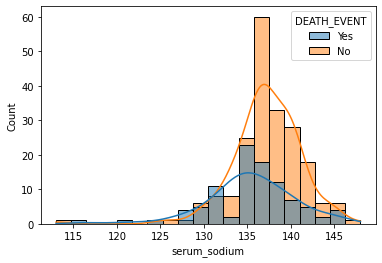

In [197]:
sns.histplot(x="serum_sodium", data=df, hue='DEATH_EVENT', kde='True')

### 혈중 나트륨 농도(mEq/L) 높은 사람들이 많으며 높다고 해서 사망자가 많이 나오지 않습니다.

## 3-3 kdeplot를 통한 이상치 여부 확인(연속형)

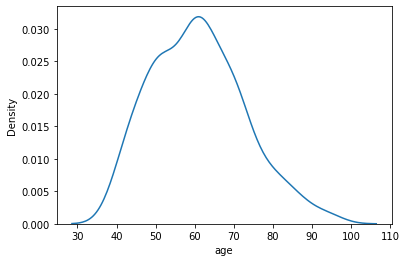

In [198]:
sns.kdeplot(x=df['age'])

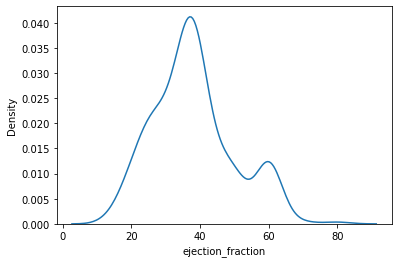

In [199]:
sns.kdeplot(x=df['ejection_fraction'])

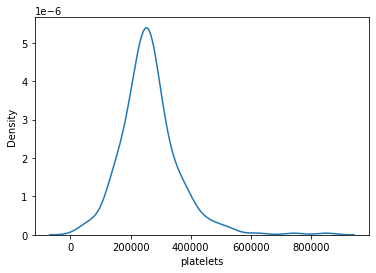

In [200]:
sns.kdeplot(x=df['platelets'])

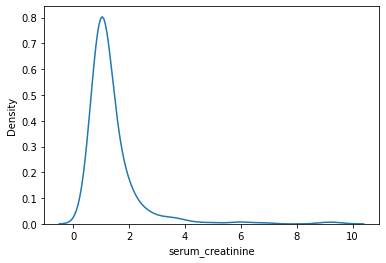

In [201]:
sns.kdeplot(x=df['serum_creatinine'])

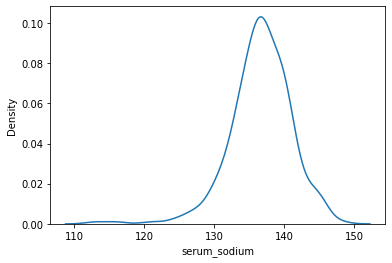

In [202]:
sns.kdeplot(x=df['serum_sodium'])

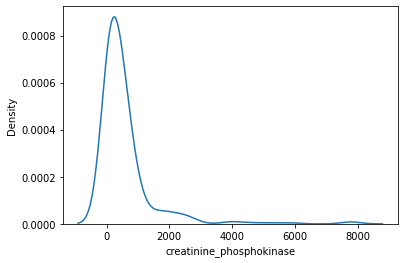

In [203]:
sns.kdeplot(x=df['creatinine_phosphokinase'])

### 완만한 곡선이 그려지지 않은 데이터 중 serum_creatinine,creatinine_phosphokinase의 이상치를 제거하기로 하였습니다.

## 3-4 HeatMap과 pairplot으로 데이터 한 눈에 보기

In [204]:
# DEATH_EVENT를 원래 대로 되돌려 놓습니다.
# 데이터 분할과 상관계수를 알아 보기 위해
df['DEATH_EVENT'] = df['DEATH_EVENT'].map({'No':0, 'Yes':1})

In [205]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,M,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,M,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,M,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,M,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,F,0,1


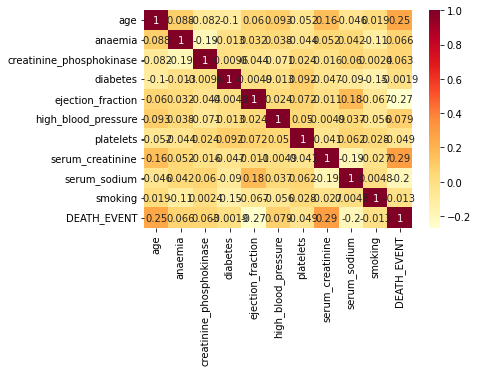

In [206]:
sns.heatmap(df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']].corr(),
            annot=True, cmap='YlOrRd')

### 전체적으로 상관이 있다고 볼 수 없습니다.

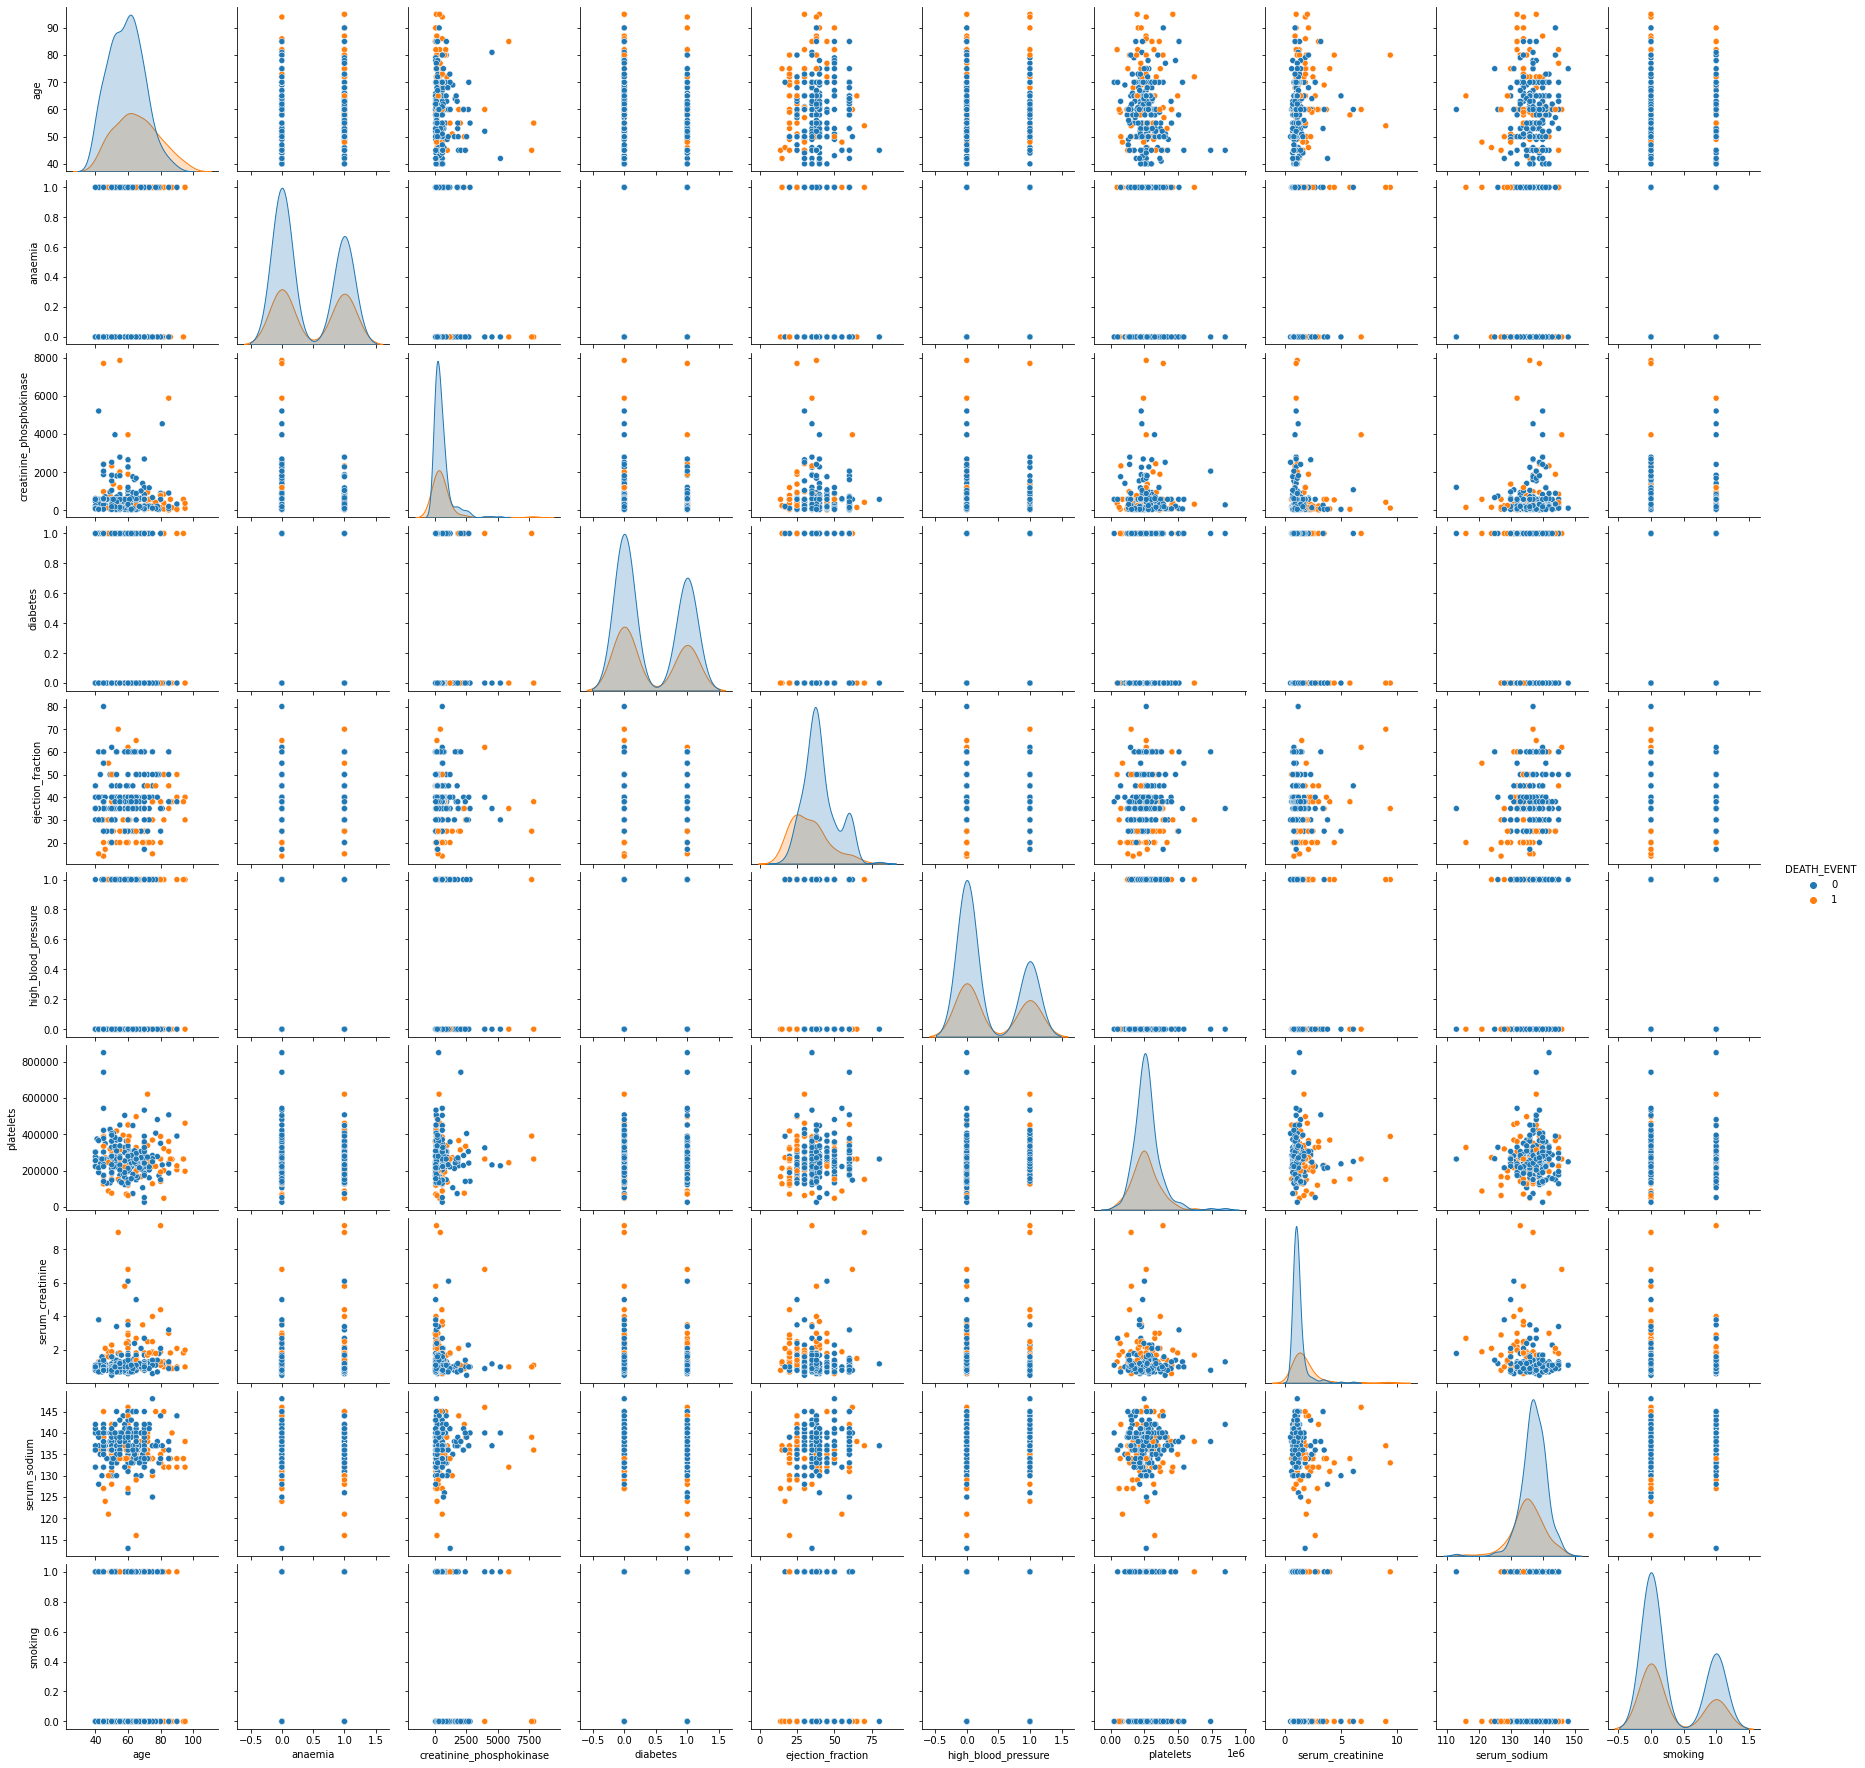

In [207]:
sns.pairplot(df, hue='DEATH_EVENT')

# 4. 데이터 전처리

## 4-1 이상치 제거(platelets,serum_creatinine,serum_sodium)

In [208]:
s1 = df['serum_creatinine'].quantile(0.95)
s2 = df['serum_creatinine'].quantile(0.005)

df = df[(s1>df['serum_creatinine']) & (df['serum_creatinine']>s2)]

In [209]:
c1 = df['creatinine_phosphokinase'].quantile(0.95)
c2 = df['creatinine_phosphokinase'].quantile(0.005)

df = df[(c1>df['creatinine_phosphokinase']) & (df['creatinine_phosphokinase']>c2)]

In [210]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,DEATH_EVENT
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.00000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,60.678208,0.438462,407.707692,0.426923,38.111538,0.35000,264389.748808,1.214192,136.630769,0.315385,0.296154
std,11.744431,0.497156,412.254288,0.495585,12.008325,0.47789,98592.413850,0.435843,4.461138,0.465565,0.457440
min,40.000000,0.000000,52.000000,0.000000,14.000000,0.00000,25100.000000,0.700000,113.000000,0.000000,0.000000
25%,50.000000,0.000000,118.750000,0.000000,30.000000,0.00000,214500.000000,0.900000,134.000000,0.000000,0.000000
50%,60.000000,0.000000,238.500000,0.000000,38.000000,0.00000,263358.030000,1.100000,137.000000,0.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.00000,302250.000000,1.300000,140.000000,1.000000,1.000000
max,95.000000,1.000000,2060.000000,1.000000,80.000000,1.00000,850000.000000,2.900000,148.000000,1.000000,1.000000


In [211]:
df['sex'] = df['sex'].astype('category')  

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       260 non-null    float64 
 1   anaemia                   260 non-null    int64   
 2   creatinine_phosphokinase  260 non-null    int64   
 3   diabetes                  260 non-null    int64   
 4   ejection_fraction         260 non-null    int64   
 5   high_blood_pressure       260 non-null    int64   
 6   platelets                 260 non-null    float64 
 7   serum_creatinine          260 non-null    float64 
 8   serum_sodium              260 non-null    int64   
 9   sex                       260 non-null    category
 10  smoking                   260 non-null    int64   
 11  DEATH_EVENT               260 non-null    int64   
dtypes: category(1), float64(3), int64(8)
memory usage: 24.8 KB


### 이상치를 제거 후 describe을 통해 데이터 확인 결과 age,creatinine_phosphokinase,ejection_fraction, platelets 표준편차가 크기에 스케일링을 해주기로 하였습니다. 

## 4-2 스케일링하기(age,creatinine_phosphokinase,ejection_fraction, platelets)

In [213]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

In [214]:
from sklearn.preprocessing import StandardScaler

X_num = df[['age','creatinine_phosphokinase','ejection_fraction', 'platelets']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index= X_num.index,
                        columns=X_num.columns) # 스케일링 해주기( 기울기 극단적으로 가지 않기 위해 )

## 4-3 카테고리 데이터인 sex 원핫 인코딩 하기

In [215]:
X_cat = df['sex']
X_cat = pd.get_dummies(X_cat)
X_cat.head()

,F,M
0,0,1
2,0,1
3,0,1
4,1,0
6,0,1


## 4-4 데이터 나누기

In [216]:
# 스케일링한 값과 원핫 인코딩한 값 삭제
df1 = df.drop(['age','creatinine_phosphokinase','ejection_fraction', 'platelets','DEATH_EVENT','sex'],axis=1)

In [217]:
df1.columns

Index(['anaemia', 'diabetes', 'high_blood_pressure', 'serum_creatinine',
       'serum_sodium', 'smoking'],
      dtype='object')

In [218]:
X=pd.concat([X_cat,X_num,df1], axis=1)

In [219]:
X.columns

Index(['F', 'M', 'age', 'creatinine_phosphokinase', 'ejection_fraction',
       'platelets', 'anaemia', 'diabetes', 'high_blood_pressure',
       'serum_creatinine', 'serum_sodium', 'smoking'],
      dtype='object')

In [220]:
y = df['DEATH_EVENT']

In [221]:
y

0      1
2      1
3      1
4      1
6      1
      ..
293    0
294    0
295    0
296    0
298    0
Name: DEATH_EVENT, Length: 260, dtype: int64

## 4-5 train, test 데이터 나누기

In [222]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

In [223]:
X_train.shape, X_test.shape

((174, 12), (86, 12))

In [224]:
y_train.shape, y_test.shape

((174,), (86,))

# 5.모델별 학습과 평가

In [256]:
# 모델학습과 평가 함수 제작
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
import time

def get_clf_eval(y_test, pred):
  confusion = confusion_matrix(y_test,pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test,pred)
  recall = recall_score(y_test,pred)
  f1 = f1_score(y_test,pred)
  print('오차행렬')
  print(confusion)
  print('정확도:',accuracy , '정밀도:',precision, '민감도:',recall, 'f1:',f1)

In [257]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
  start_time =time.time()
  model.fit(ftr_train, tgt_train)
  pred = model.predict(ftr_test)
  get_clf_eval(tgt_test,pred)
  print('수행시간:', time.time()-start_time)

### 1) LogisticRegression 모델

In [258]:
model_lr = LogisticRegression(max_iter=1000)
get_model_train_eval(model_lr, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[59  5]
 [12 10]]
정확도: 0.8023255813953488 정밀도: 0.6666666666666666 민감도: 0.45454545454545453 f1: 0.5405405405405405
수행시간: 0.03304266929626465


### 2) LGBMClassifier

In [259]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =1000, num_leaves = 64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[61  3]
 [14  8]]
정확도: 0.8023255813953488 정밀도: 0.7272727272727273 민감도: 0.36363636363636365 f1: 0.4848484848484849
수행시간: 0.14077425003051758


### 3)RandomForestClassifier

In [260]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[61  3]
 [14  8]]
정확도: 0.8023255813953488 정밀도: 0.7272727272727273 민감도: 0.36363636363636365 f1: 0.4848484848484849
수행시간: 2.396299123764038


### 4)KNN

In [261]:
# 19로 두었을 때 정확도가 높음
# 단 1을 예측을 하지 않음
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=19)
get_model_train_eval(knn, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[64  0]
 [22  0]]
정확도: 0.7441860465116279 정밀도: 0.0 민감도: 0.0 f1: 0.0
수행시간: 0.01700901985168457


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5)DecisionTreeClassifier

In [262]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
get_model_train_eval(dt_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[55  9]
 [ 9 13]]
정확도: 0.7906976744186046 정밀도: 0.5909090909090909 민감도: 0.5909090909090909 f1: 0.5909090909090909
수행시간: 0.023822784423828125


###6) GradientBoostingClassifier

In [263]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state = 0)
get_model_train_eval(dt_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[55  9]
 [ 9 13]]
정확도: 0.7906976744186046 정밀도: 0.5909090909090909 민감도: 0.5909090909090909 f1: 0.5909090909090909
수행시간: 0.020090579986572266


### 7)XGBClassifier

In [264]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
get_model_train_eval(xgb_clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test )

오차행렬
[[60  4]
 [12 10]]
정확도: 0.813953488372093 정밀도: 0.7142857142857143 민감도: 0.45454545454545453 f1: 0.5555555555555556
수행시간: 0.033525705337524414


## 평가: 자료 불균형으로 인해서 결과가 이상하게 나온다고 판단을 하여 SMOTE를 이용해 불균형을 없애고 다시 학습을 하기로 결정하였습니다.

# 6.SMOTE

In [265]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트:', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트:', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포:\n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트: (174, 12) (174,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트: (238, 12) (238,)
SMOTE 적용 후 레이블 값 분포:
 1    119
0    119
Name: DEATH_EVENT, dtype: int64


# 7. SMOTE 후 모델학습 및 평가

### 1) LogisticRegression 모델

In [266]:
model_lr = LogisticRegression(max_iter=1000)
get_model_train_eval(model_lr, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[46 18]
 [ 7 15]]
정확도: 0.7093023255813954 정밀도: 0.45454545454545453 민감도: 0.6818181818181818 f1: 0.5454545454545454
수행시간: 0.02886676788330078


### 2) LGBMClassifier

In [267]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators =1000, num_leaves = 64,
                         n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[54 10]
 [11 11]]
정확도: 0.7558139534883721 정밀도: 0.5238095238095238 민감도: 0.5 f1: 0.5116279069767442
수행시간: 0.14875578880310059


### 3)RandomForestClassifier

In [268]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators =1000, n_jobs = -1)
get_model_train_eval(rf_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[58  6]
 [11 11]]
정확도: 0.8023255813953488 정밀도: 0.6470588235294118 민감도: 0.5 f1: 0.5641025641025642
수행시간: 2.410494565963745


### 4)KNN

In [269]:
# 19로 두었을 때 정확도가 높음
# 단 1을 예측을 하지 않음
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=19)
get_model_train_eval(knn, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[26 38]
 [ 9 13]]
정확도: 0.45348837209302323 정밀도: 0.2549019607843137 민감도: 0.5909090909090909 f1: 0.35616438356164387
수행시간: 0.020511865615844727


### 5)DecisionTreeClassifier

In [270]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156)
get_model_train_eval(dt_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[44 20]
 [ 8 14]]
정확도: 0.6744186046511628 정밀도: 0.4117647058823529 민감도: 0.6363636363636364 f1: 0.5
수행시간: 0.01503443717956543


###6) GradientBoostingClassifier

In [271]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state = 0)
get_model_train_eval(dt_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[44 20]
 [ 8 14]]
정확도: 0.6744186046511628 정밀도: 0.4117647058823529 민감도: 0.6363636363636364 f1: 0.5
수행시간: 0.020204544067382812


### 7)XGBClassifier

In [272]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
get_model_train_eval(xgb_clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test )

오차행렬
[[57  7]
 [11 11]]
정확도: 0.7906976744186046 정밀도: 0.6111111111111112 민감도: 0.5 f1: 0.55
수행시간: 0.04050588607788086


## 평가: 정확도 보다 1인 많이 맞추는 모델이 필요함으로 전체적으로 비교했을 때 정확도 괞찬고 민감도가 높은 LogisticRegression 모델를 선택하였습니다.

# 8. 중요도 시각화

In [273]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [274]:
importance = model_lr.coef_[0]
feature = X_train_over.columns
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

,feature,importances
0,age,0.069047
1,serum_creatinine,0.004508
2,creatinine_phosphokinase,0.000194
3,platelets,0.000003
4,diabetes,-0.000076
5,anaemia,-0.000329
6,F,-0.000503
7,high_blood_pressure,-0.000929
8,smoking,-0.001493
9,M,-0.002373


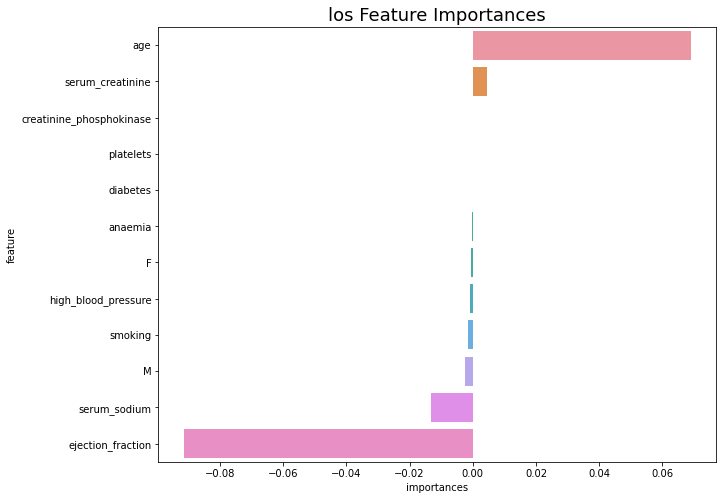

In [275]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importances', y='feature', data=importances)
plt.title('los Feature Importances', fontsize=18)
plt.show()

In [ ]:
Age: 나이
anaemia: 적혈구 또는 헤모글로빈(부울) 감소
creatinine_phosphokinase: 혈중 CPK 효소 수치(mcg/L)
diabetes: 환자에게 당뇨병이 있는 경우(부울)
ejection_fraction: 각 수축 시 심장에서 나가는 혈액의 백분율(백분율)
high_blood_pressure: 환자에게 고혈압이 있는 경우(부울)
platelets: 혈액 내 혈소판(킬로혈소판/mL)
serum_creatinine: 혈액 내 혈청 크레아티닌 수치(mg/dL)
serum_sodium: 혈중 나트륨 농도(mEq/L)
sex: 여자 또는 남자(바이너리)
smoking: 환자가 담배를 피우는지 여부(boolean)
time :사후관리 기간(일)
DEATH_EVENT: 추적 기간 동안 환자가 사망한 경우(boolean)

## 평가: 심부전 환자 중 나이가 많을 수록 죽을 가능성이 높다는 것을 알게되었습니다. 그 다음은 혈액 내 혈청 크레아티닌 수치(mg/dL)가 높은 사람일 수록 죽을 가능성이 높다는 것을 예측 할 수 있습니다. 
